In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001102287"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001102287
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,PREMIERWEST BANCORP
Ticker,PRWT


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,27.0,5.008519e+00,2.505429e+00,0.57,4.315000e+00,5.8,6.82,8.04
interest income,20.0,1.635025e+07,4.047694e+06,7850000.00,1.357675e+07,15826500.0,18934500.00,22955000.00
net income,21.0,-6.851905e+05,3.469635e+06,-6754000.00,-3.088000e+06,-801000.0,1803000.00,3801000.00
net interest income,37.0,1.265476e+07,2.276763e+06,6100000.00,1.137400e+07,13126000.0,14311000.00,15739000.00
provision for loan losses,27.0,1.462644e+07,2.743252e+07,0.00,2.875000e+05,2350000.0,9500000.00,88031000.00


# Plots

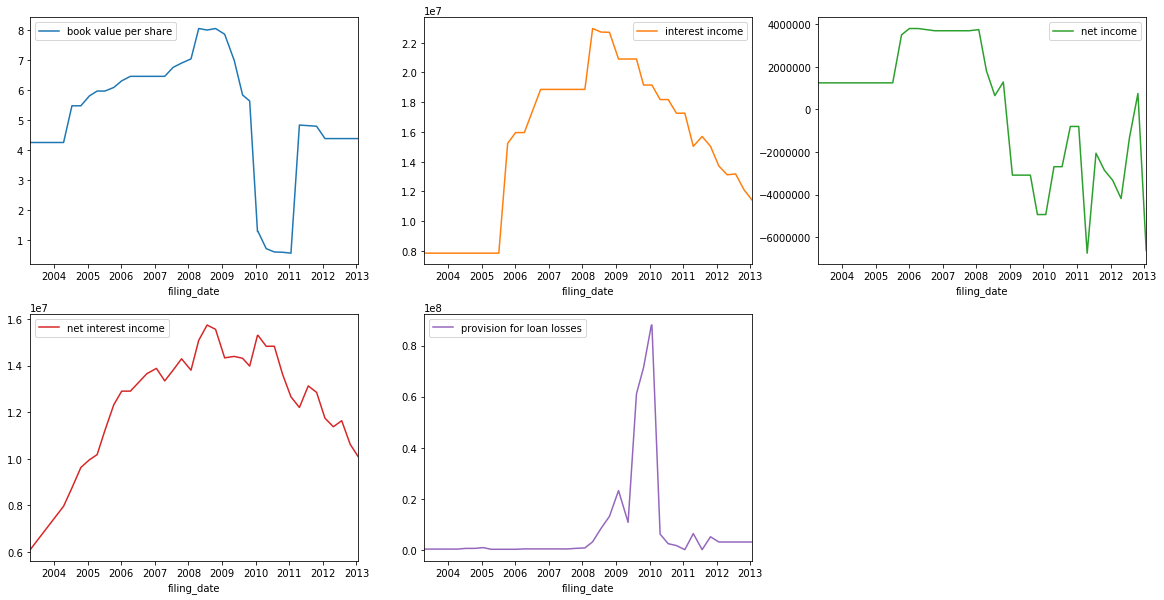

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0001102287 book value per share       2003Q1 to 2004Q1: 5 periods  missing   
           book value per share                            2004Q3  missing   
           book value per share                            2005Q2  missing   
           book value per share       2006Q2 to 2007Q1: 4 periods  missing   
           book value per share       2012Q1 to 2012Q4: 4 periods  missing   
           interest income                                 2002Q4  missing   
           interest income            2003Q2 to 2005Q2: 9 periods  missing   
           interest income            2006Q1 to 2006Q2: 2 periods  missing   
           interest income            2006Q4 to 2007Q4: 5 periods  missing   
           interest income            2009Q1 to 2009Q2: 2 periods  missing   
           interest income                                 2009Q4  missing   
           interest income                                 2010Q2  missing   
           interest income                                 2010Q4  missing   
           net income                                      2002Q4  missing   
           net income                 2003Q2 to 2005Q2: 9 periods  missing   
           net income                 2006Q1 to 2006Q2: 2 periods  missing   
           net income                 2006Q4 to 2007Q3: 4 periods  missing   
           net income                 2009Q1 to 2009Q2: 2 periods  missing   
           net income                                      2009Q4  missing   
           net income                                      2010Q2  missing   
           net income                                      2010Q4  missing   
           net interest income                             2002Q4  missing   
           net interest income        2003Q2 to 2003Q4: 3 periods  missing   
           net interest income        2006Q1 to 2006Q2: 2 periods  missing   
           provision for loan losses  2003Q1 to 2004Q1: 5 periods  missing   
           provision for loan losses                       2004Q3  missing   
           provision for loan losses                       2005Q2  missing   
           provision for loan losses  2006Q2 to 2007Q1: 4 periods  missing   
           provision for loan losses  2012Q1 to 2012Q4: 4 periods  missing   
           total revenue                                     None    empty   

                                                 message  
cik        item                                           
0001102287 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loa

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()